## Import Libraries

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import pandas as pd
import zipfile
import re
import os
import pathlib
print(tf.__version__)

1.14.0


Using TensorFlow backend.


##Mount Drive where images are stored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##Import Dataset

#### Importing the training and validation image numbers from the input files

In [0]:
training_array=[]
validation_array=[]
with open("tst1.txt") as f:
  for line in f:
    training_array.append(line.strip())
with open("trn1.txt") as f:
  for line in f:
    validation_array.append(line.strip())

#### Create a dictionary with image_ids and their corresponding labels

In [4]:
dataset_path='classlabels.txt'
images_labels={}
with open(dataset_path) as f:
        data = f.read().splitlines()
        for d in data:
            images_labels[d.split(' ')[0].rstrip(",")]=int(d.split(' ')[1])
print(images_labels)

{'JFT_00001.jpg': 1, 'JFT_00002.jpg': 1, 'JFT_00003.jpg': 1, 'JFT_00004.jpg': 1, 'JFT_00006.jpg': 1, 'JFT_00008.jpg': 1, 'JFT_00009.jpg': 1, 'JFT_00010.jpg': 1, 'JFT_00018.jpg': 2, 'JFT_00020.jpg': 2, 'JFT_00021.jpg': 2, 'JFT_00022.jpg': 2, 'JFT_00023.jpg': 2, 'JFT_00024.jpg': 2, 'JFT_00026.jpg': 2, 'JFT_00036.jpg': 2, 'JFT_00039.jpg': 2, 'JFT_00043.jpg': 2, 'JFT_00050.jpg': 2, 'JFT_00051.jpg': 2, 'JFT_00053.jpg': 2, 'JFT_00055.jpg': 2, 'JFT_00061.jpg': 2, 'JFT_00062.jpg': 2, 'JFT_00063.jpg': 2, 'JFT_00064.jpg': 2, 'JFT_00066.jpg': 2, 'JFT_00075.jpg': 2, 'JFT_00078.jpg': 3, 'JFT_00082.jpg': 3, 'JFT_00084.jpg': 3, 'JFT_00086.jpg': 3, 'JFT_00088.jpg': 3, 'JFT_00089.jpg': 3, 'JFT_00090.jpg': 3, 'JFT_00092.jpg': 3, 'JFT_00097.jpg': 3, 'JFT_00098.jpg': 3, 'JFT_00100.jpg': 3, 'JFT_00101.jpg': 3, 'JFT_00103.jpg': 3, 'JFT_00105.jpg': 3, 'JFT_00109.jpg': 3, 'JFT_00111.jpg': 3, 'JFT_00112.jpg': 3, 'JFT_00113.jpg': 3, 'JFT_00114.jpg': 3, 'JFT_00116.jpg': 3, 'JFT_00119.jpg': 4, 'JFT_00121.jpg': 4,

#### Load the training and validaton images and their corresponding labels as numpy arrays

In [0]:
train_image = []
train_label = []
training_array=[str(item).zfill(5) for item in training_array]
validation_image = []
validation_label = []
validation_array=[str(item).zfill(5) for item in validation_array]

for i in range(len(training_array)):
    img1 = image.load_img('/content/drive/My Drive/Assignment2_Images/jpg/'+'JFT_'+training_array[i]+'.jpg',target_size=(32,32,3))
    img1 = image.img_to_array(img1)
    img1 = img1/255
    train_image.append(img1)
    train_label.append(images_labels['JFT_'+training_array[i]+'.jpg']-1)
training_images = np.array(train_image)
training_labels = np.array(train_label)

for i in range(len(validation_array)):
    img2 = image.load_img('/content/drive/My Drive/Assignment2_Images/jpg/'+'JFT_'+validation_array[i]+'.jpg',target_size=(32,32,3))
    img2 = image.img_to_array(img2)
    img2 = img2/255
    validation_image.append(img2)
    validation_label.append(images_labels['JFT_'+validation_array[i]+'.jpg']-1)
validation_images = np.array(validation_image)
validation_labels = np.array(validation_label)



In [16]:
print(len(training_images))
print(len(validation_images))


921
279


#### Check if data is loaded properly

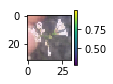

In [11]:
plt.figure(figsize = (1,1))
img1 = training_images[1]
plt.imshow(img1)
plt.colorbar()
plt.grid(False)

In [17]:
training_images.shape[1:]

(32, 32, 3)

###IDentifying Baseline accuracy

### Model Development

In [0]:
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=training_images.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
# Output classes are 10
    model.add(Dense(30)) 
    model.add(Activation('softmax'))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 32)        18464     
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
history = model.fit(training_images, training_labels, batch_size=128, 
                    validation_data = (validation_images, validation_labels), epochs=100)

Train on 921 samples, validate on 279 samples
Epoch 1/100
921/921 [==============================] - 5s 6ms/step - loss: 0.2470 - acc: 0.9175 - val_loss: 0.7202 - val_acc: 0.8208
Epoch 2/100
921/921 [==============================] - 6s 6ms/step - loss: 0.2025 - acc: 0.9392 - val_loss: 0.6766 - val_acc: 0.8280
Epoch 3/100
921/921 [==============================] - 6s 6ms/step - loss: 0.1693 - acc: 0.9479 - val_loss: 0.7559 - val_acc: 0.8280
Epoch 4/100
921/921 [==============================] - 6s 6ms/step - loss: 0.2072 - acc: 0.9197 - val_loss: 0.8272 - val_acc: 0.8100
Epoch 5/100
921/921 [==============================] - 6s 6ms/step - loss: 0.2377 - acc: 0.9131 - val_loss: 0.7057 - val_acc: 0.8208
Epoch 6/100
921/921 [==============================] - 6s 6ms/step - loss: 0.2281 - acc: 0.9229 - val_loss: 0.7523 - val_acc: 0.8100
Epoch 7/100
921/921 [==============================] - 6s 6ms/step - loss: 0.2041 - acc: 0.9240 - val_loss: 0.8759 - val_acc: 0.7957
Epoch 8/100
921/921 [==

###Find the Baseline Accuracy
-Identify the class which is common among all the predictions
-Calculate the accuracy by dividing the number of predictions of this class with total predictions

In [72]:
unique, counts = np.unique(validation_labels, return_counts=True)
validation_labels_dict=dict(zip(unique, counts))

maximum = max(validation_labels_dict, key=validation_labels_dict.get)  
print("The class with maximum predictions under it",validation_labels_dict[maximum]+1,"Total number of predictions",sum(validation_labels_dict.values()))
print("Baseline Accuracy",validation_labels_dict[maximum]/sum(validation_labels_dict.values()))

The class with maximum predictions under it 11 Total number of predictions 279
Baseline Accuracy 0.035842293906810034


###Model Performance

In [73]:
print("Model maximum accuracy:",max(history.history['val_acc']))

baseline model minimum accuracy: 0.8458781370552637


The model seems to produce maximum validation accuracy of 84% which is much higher than the baseline accuracy of 3%.There seems to be no overfitting.

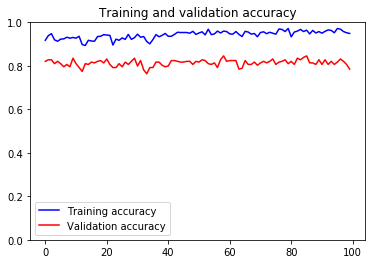

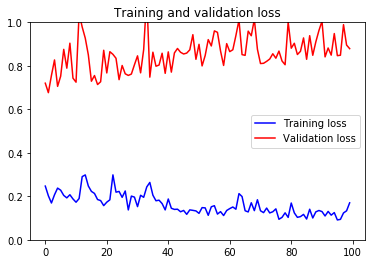

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim([0, 1])
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.ylim([0, 1])
 
plt.show()